# Immigration Tweets Classification Using BART Large MNLI: Economic distress and anti-immigrant sentiment

#### Importing the Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
from tqdm import tqdm #to see the execution time simulatenously under the cell
import time
pd.set_option('display.max_colwidth', -1)

C:\Users\Topcu\AppData\Local\Temp\ipykernel_17412\3481063381.py:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
sns.set_style("darkgrid")
sns.set_palette(sns.color_palette("tab10", 8))

#### Reading the UK Immigration Data

In [3]:
df = pd.read_csv("uk_tweets.csv") 

In [4]:
df.shape

(34490, 38)

In [5]:
df = df.iloc[14490:]#cutting the dataset into a subset of 20_000 tweets 

In [6]:
df.shape

(20000, 38)

In [7]:
df.head()

,tweet_id,created_at,author_id,place_id,place_name,full_place_name,lat,long,exact_coords,bbox,...,source,conversation_id,reply_settings,referenced_tweets_type,referenced_tweets_id,in_reply_to_user_id,annotations,mentions,linked_url,possibly_sensitive
14490,1449103973336633351,2021-10-15 20:04:44+00:00,103337452,208d28e57bdc12e9,Wales,"Wales, United Kingdom",-4.001617,52.404436,False,-5.35340678071236 51.3787780012005 -2.64982707940341 53.4300939018827,...,Twitter for Android,1449103973336633351,everyone,quoted,1449089899181875205,,,"[{'start': 8, 'end': 19, 'username': 'pritipatel', 'id': '61660254'}]",https://twitter.com/boblister_poole/status/1449089899181875205,False
14491,1449101643988049926,2021-10-15 19:55:29+00:00,2980988093,3fc4ee9a5c7f6631,Mold,"Mold, Wales",-3.142320,53.163032,False,-3.160864 53.145747 -3.123776 53.180316,...,Twitter for Android,1448964842371571713,everyone,replied_to,1449065014845919234,1448054416867725312,,"[{'start': 0, 'end': 9, 'username': 'Dallyhoo', 'id': '1448054416867725312'}, {'start': 10, 'end': 20, 'username': 'mrjamesob', 'id': '152656121'}]",,False
14492,1449099979847520260,2021-10-15 19:48:52+00:00,882246657081040896,346ba13a397214bc,Quorn,"Quorn, England",-1.172350,52.743434,False,-1.1886348 52.7364063 -1.156066 52.750462,...,Twitter for iPhone,1449038510560796675,everyone,replied_to,1449038510560796675,69906530,"[{'start': 111, 'end': 114, 'probability': 0.4605, 'type': 'Organization', 'normalized_text': 'Tory'}]","[{'start': 0, 'end': 9, 'username': 'PALillie', 'id': '69906530'}]",,False
14493,1449099547574161433,2021-10-15 19:47:09+00:00,1137368657477230592,5c6453db6560163a,Stoke-on-Trent,"Stoke-on-Trent, England",-2.154013,53.019397,False,-2.226804 52.9489413 -2.081221 53.089852,...,Twitter for Android,1449092642005004294,everyone,replied_to,1449092642005004294,1082724950228811777,"[{'start': 42, 'end': 48, 'probability': 0.9849, 'type': 'Place', 'normalized_text': 'Britain'}]","[{'start': 17, 'end': 31, 'username': 'fredchapman46', 'id': '1114501738227208194'}]",,False
14494,1449096295235440644,2021-10-15 19:34:14+00:00,19508952,42d0cf7d49d27c95,Hillingdon,"Hillingdon, London",-0.442361,51.537061,False,-0.5086841 51.4551164 -0.3760375 51.619006,...,Twitter for iPhone,1449096295235440644,everyone,,,,"[{'start': 33, 'end': 35, 'probability': 0.5371, 'type': 'Place', 'normalized_text': 'LHR'}]",,,False


In [8]:
df.columns

Index(['tweet_id', 'created_at', 'author_id', 'place_id', 'place_name',
       'full_place_name', 'lat', 'long', 'exact_coords', 'bbox', 'place_type',
       'country_code', 'country', 'lang', 'retweet_count', 'reply_count',
       'like_count', 'quote_count', 'text', 'username', 'user_name',
       'followers_count', 'following_count', 'tweet_count', 'listed_count',
       'user_url', 'user_loc', 'user_desc', 'source', 'conversation_id',
       'reply_settings', 'referenced_tweets_type', 'referenced_tweets_id',
       'in_reply_to_user_id', 'annotations', 'mentions', 'linked_url',
       'possibly_sensitive'],
      dtype='object')

#### Daily Tweet Counts

In [9]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [10]:
sns.set_style("darkgrid")
sns.set_palette(sns.color_palette("husl", 8))

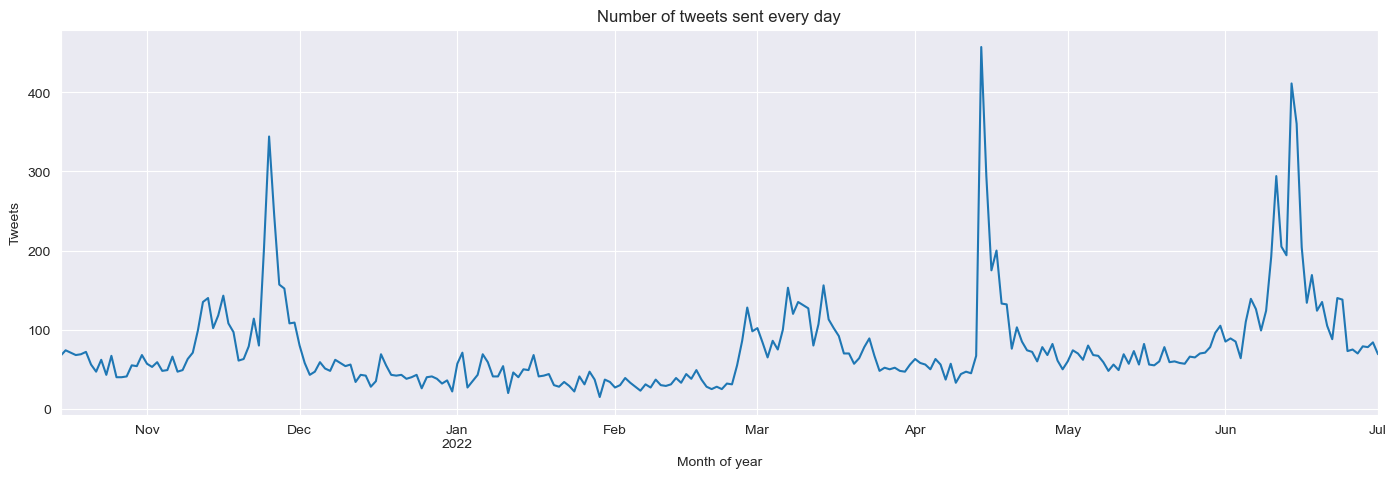

In [15]:
df.resample('1d', on='created_at').size().plot(xlabel ='Month of year', 
                                         ylabel='Tweets',
                                         figsize=(17,5),
                                         grid=True,
                                        colormap="tab10",
                                        title="Number of tweets sent every day")
plt.savefig(r"D:\refugee-1-M\refugee-1M-four-batches\refugee-1M-lemma-batches\plots\total-tweet-counts.pdf",bbox_inches='tight', dpi=300)

In [16]:
df = df.dropna(subset=['lat', 'long','text']) #dropping point na values for BART  

In [17]:
df.shape

(20000, 38)

# BART Large MNLI Topic Classification 

In [18]:
labels = ['Economy', 'Politics', 'Human Trafficking', 'Citizenship', 'Border Crossing','Illegal Migrants','Human Rights']
#arrived at these through intuition after the GSDMM model's topics

In [19]:
classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli') #https://huggingface.co/facebook/bart-large-mnli

In [21]:
df['labels'] = [None]*len(df)
for i, row in tqdm(df.iterrows(), total=len(df), desc="Classifying tweets"):
    df.at[i, 'labels'] = classifier(row['text'], labels, multi_label=True) #2:08:09 seconds for two thousand tweets

Classifying tweets: 100%|█████████████████████████████████████████████████████| 20000/20000 [19:01:23<00:00,  3.42s/it]


In [22]:
df['predicted_topic'] = df.apply(lambda row: row['labels']['labels'][0], axis=1)
df['predicted_topic_score'] = df.apply(lambda row: row['labels']['scores'][0], axis=1)

In [23]:
df.to_csv(r"D:\refugee-1-M\refugee-1M-four-batches\refugee-1M-lemma-batches\uk-bart-labelled-datasets\uk-bart-topic-labelled-20.csv")

#### Topic Distributions 

In [31]:
grouped_df = df.groupby('predicted_topic')
counts = pd.DataFrame(grouped_df["labels"].count()).sort_values(by='labels', ascending=False)

In [32]:
counts 

,labels
predicted_topic,
Illegal Migrants,7165
Politics,6017
Economy,2855
Human Rights,1604
Citizenship,983
Border Crossing,964
Human Trafficking,412


In [33]:
counts.to_csv(r"D:\refugee-1-M\refugee-1M-four-batches\refugee-1M-lemma-batches\uk-bart-labelled-datasets\uk-bart-topic-labelled-20-topic-counts-df.csv")

#### Topic Percentages 

C:\Users\Topcu\AppData\Local\Temp\ipykernel_17412\1115161479.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  myexplode = list(np.full(shape=7,fill_value=0.1,dtype=np.float))


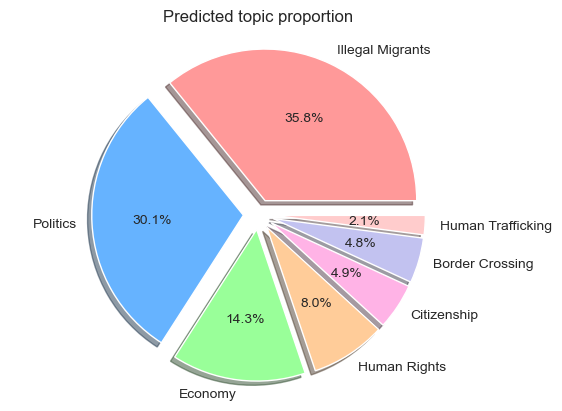

In [34]:
sns.set_style("darkgrid")
labels = counts.index
sizes = counts.labels
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffb3e6','#c2c2f0','#ffcccc']
myexplode = list(np.full(shape=7,fill_value=0.1,dtype=np.float))
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', explode=myexplode, shadow=True)
plt.axis('equal')
plt.title("Predicted topic proportion")
plt.savefig(r"D:\refugee-1-M\refugee-1M-four-batches\refugee-1M-lemma-batches\plots\topics-proportion-pie.pdf", format="pdf", bbox_inches="tight")
plt.show()


#### Time Series Topic Distribution 

In [38]:
economy = df[df["predicted_topic"].str.contains("Economy")]
politics = df[df["predicted_topic"].str.contains("Politics")]
illegal = df[df["predicted_topic"].str.contains("Illegal Migrants")]
citizenship = df[df["predicted_topic"].str.contains("Citizenship")]
rights = df[df["predicted_topic"].str.contains("Human Rights")]
trafficking = df[df["predicted_topic"].str.contains("Human Trafficking")]
border = df[df["predicted_topic"].str.contains("Border Crossing")]

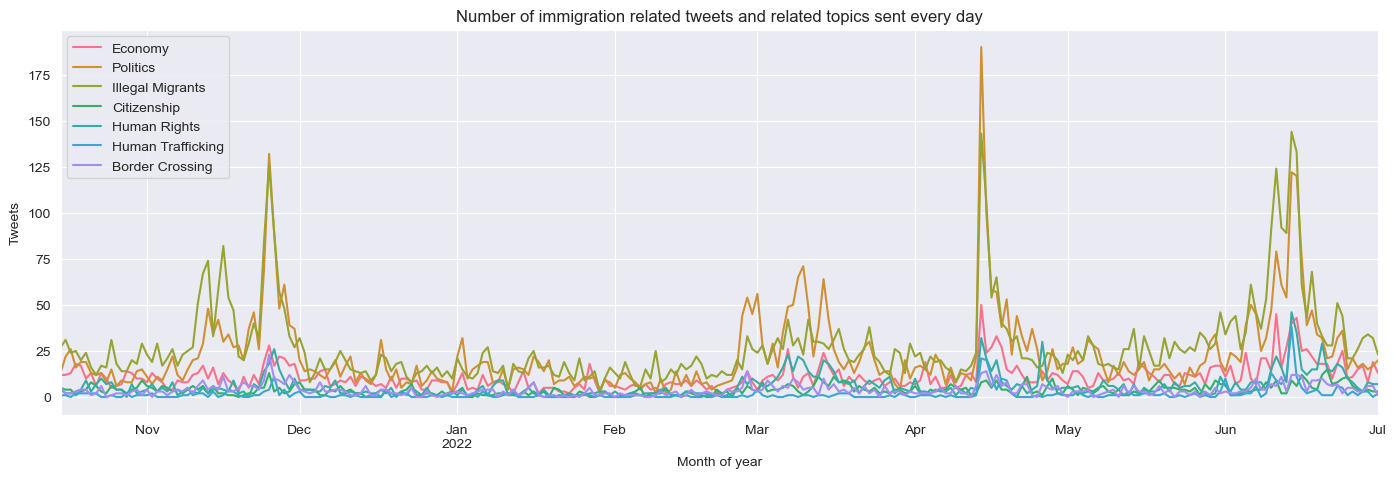

In [39]:
economy.resample('1d', on='created_at').size().plot(xlabel ='Month of year', 
                                         ylabel='Tweets',
                                         figsize=(17,5),
                                         grid=True,
                                        label = "Economy")
politics.resample('1d', on='created_at').size().plot(xlabel ='Month of year', 
                                         ylabel='Tweets',
                                         figsize=(17,5),
                                         grid=True,
                                        label = "Politics")
illegal.resample('1d', on='created_at').size().plot(xlabel ='Month of year', 
                                         ylabel='Tweets',
                                         figsize=(17,5),
                                         grid=True,
                                        label = "Illegal Migrants")
citizenship.resample('1d', on='created_at').size().plot(xlabel ='Month of year', 
                                         ylabel='Tweets',
                                         figsize=(17,5),
                                         grid=True,
                                        label = "Citizenship")
rights.resample('1d', on='created_at').size().plot(xlabel ='Month of year', 
                                         ylabel='Tweets',
                                         figsize=(17,5),
                                         grid=True,
                                        label = "Human Rights")
trafficking.resample('1d', on='created_at').size().plot(xlabel ='Month of year', 
                                         ylabel='Tweets',
                                         figsize=(17,5),
                                         grid=True,
                                        label = "Human Trafficking")
border.resample('1d', on='created_at').size().plot(xlabel ='Month of year', 
                                         ylabel='Tweets',
                                         figsize=(17,5),
                                         grid=True,
                                        label = "Border Crossing")

plt.title('Number of immigration related tweets and related topics sent every day')
plt.legend()
plt.savefig(r"D:\refugee-1-M\refugee-1M-four-batches\refugee-1M-lemma-batches\plots\topics-time-series.pdf", format="pdf", bbox_inches="tight")
plt.show()

# BART Large MNLI Sentiment Analysis 

In [183]:
classes_list = ['anti-immigrant sentiment', 'pro-immigrant sentiment']

In [50]:
classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli')

In [184]:
df['labels_sentiment'] = [None]*len(df)
for i, row in tqdm(df.iterrows(), total=len(df), desc="Finding the sentiment of each tweet"):
    df.at[i, 'labels_sentiment'] = classifier(row['text'], classes_list) 

Finding the sentiment of each tweet: 100%|█████████████████████████████████████| 20000/20000 [5:37:36<00:00,  1.01s/it]


In [185]:
df['predicted_sentiment_label'] = df.apply(lambda row: row['labels_sentiment']['labels'][0], axis=1)

In [186]:
df["sentiment_score"] = df.apply(lambda row: -row["labels_sentiment"]['scores'][0] if row["labels_sentiment"]['labels'][0] == 'anti-immigrant sentiment' else row['labels_sentiment']["scores"][0], axis=1)

In [193]:
df.to_csv(r"D:\refugee-1-M\refugee-1M-four-batches\refugee-1M-lemma-batches\uk-bart-labelled-datasets\sentiment-predicted-data.csv")

In [187]:
means_df = df[["created_at","predicted_sentiment_label","sentiment_score"]].reset_index()

In [188]:
means_df['date'] = means_df['created_at'].dt.date
means_df['time'] = means_df['created_at'].dt.time
means_daily = means_df.groupby(by='date').mean()
means_daily.reset_index(inplace=True)
means_daily.head()

C:\Users\Topcu\AppData\Local\Temp\ipykernel_17412\3193133671.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means_daily = means_df.groupby(by='date').mean()


,date,index,sentiment_score
0,2021-10-15,14523.0,-0.356445
1,2021-10-16,14593.5,-0.504897
2,2021-10-17,14666.0,-0.312514
3,2021-10-18,14735.5,-0.184204
4,2021-10-19,14804.0,-0.205178


In [194]:
means_daily.to_csv(r"D:\refugee-1-M\refugee-1M-four-batches\refugee-1M-lemma-batches\uk-bart-labelled-datasets\means_daily.csv")

#### Sentiment Plot (Overall)

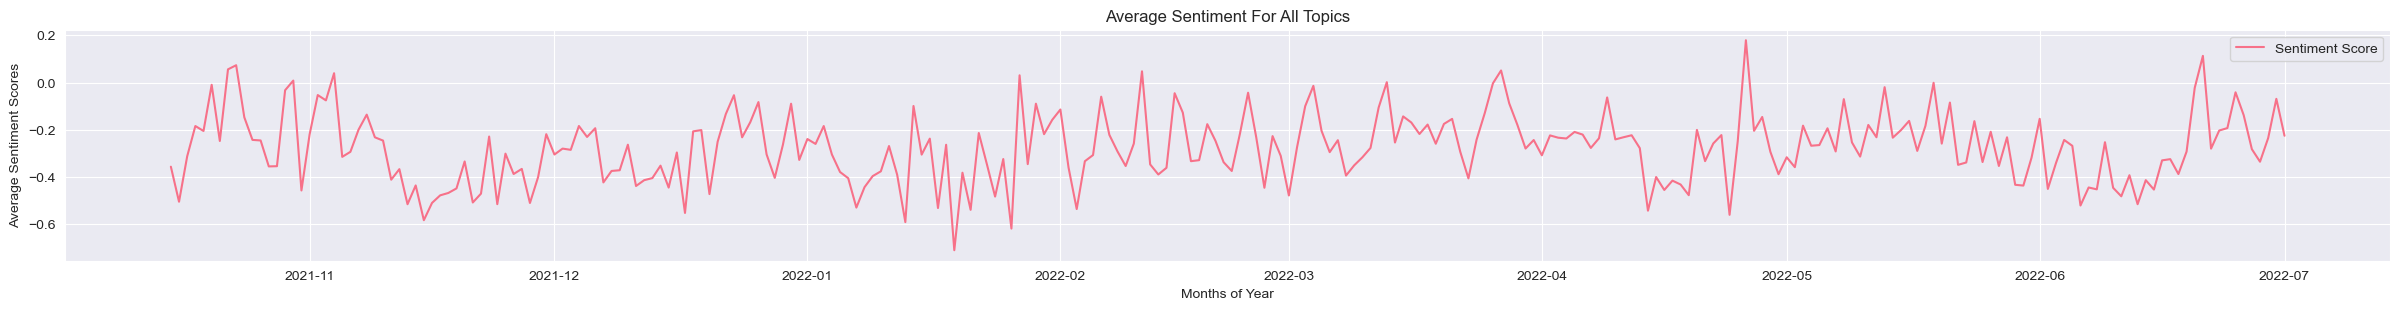

In [191]:
plt.figure(figsize=(30,3))
ax = sns.lineplot(x = "date", y = "sentiment_score",data = means_daily,label="Sentiment Score")
ax.set(xlabel='Months of Year', ylabel='Average Sentiment Scores')
plt.title("Average Sentiment For All Topics")
plt.legend()
plt.savefig(r"D:\refugee-1-M\refugee-1M-four-batches\refugee-1M-lemma-batches\plots\sentiment-plot.pdf", format="pdf", bbox_inches="tight")
plt.show()

#### Sentiment Score For Each Topic

In [202]:
df['date'] = df['created_at'].dt.date
df['time'] = df['created_at'].dt.time

In [365]:
econ = df[df['predicted_topic'] == "Economy" ].sort_values(by='created_at', ascending=False).groupby(by='date').mean()
pol = df[df['predicted_topic'] == "Politics" ].sort_values(by='created_at', ascending=False).groupby(by='date').mean()
il = df[df['predicted_topic'] == "Illegal Migrants" ].sort_values(by='created_at', ascending=False).groupby(by='date').mean()
ctz = df[df['predicted_topic'] == "Citizenship" ].sort_values(by='created_at', ascending=False).groupby(by='date').mean()
rgt = df[df['predicted_topic'] == "Human Rights" ].sort_values(by='created_at', ascending=False).groupby(by='date').mean()
trf = df[df['predicted_topic'] == "Human Trafficking" ].sort_values(by='created_at', ascending=False).groupby(by='date').mean()
brd = df[df['predicted_topic'] == "Border Crossing" ].sort_values(by='created_at', ascending=False).groupby(by='date').mean()
grouped_df = pd.concat([econ,pol,il,ctz,rgt,trf,brd])

C:\Users\Topcu\AppData\Local\Temp\ipykernel_17412\402565158.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  econ = df[df['predicted_topic'] == "Economy" ].sort_values(by='created_at', ascending=False).groupby(by='date').mean()
C:\Users\Topcu\AppData\Local\Temp\ipykernel_17412\402565158.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pol = df[df['predicted_topic'] == "Politics" ].sort_values(by='created_at', ascending=False).groupby(by='date').mean()
C:\Users\Topcu\AppData\Local\Temp\ipykernel_17412\402565158.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecate

In [217]:
grouped_df.to_csv(r"D:\refugee-1-M\refugee-1M-four-batches\refugee-1M-lemma-batches\uk-bart-labelled-datasets\uk-bart-grouped-df.csv")

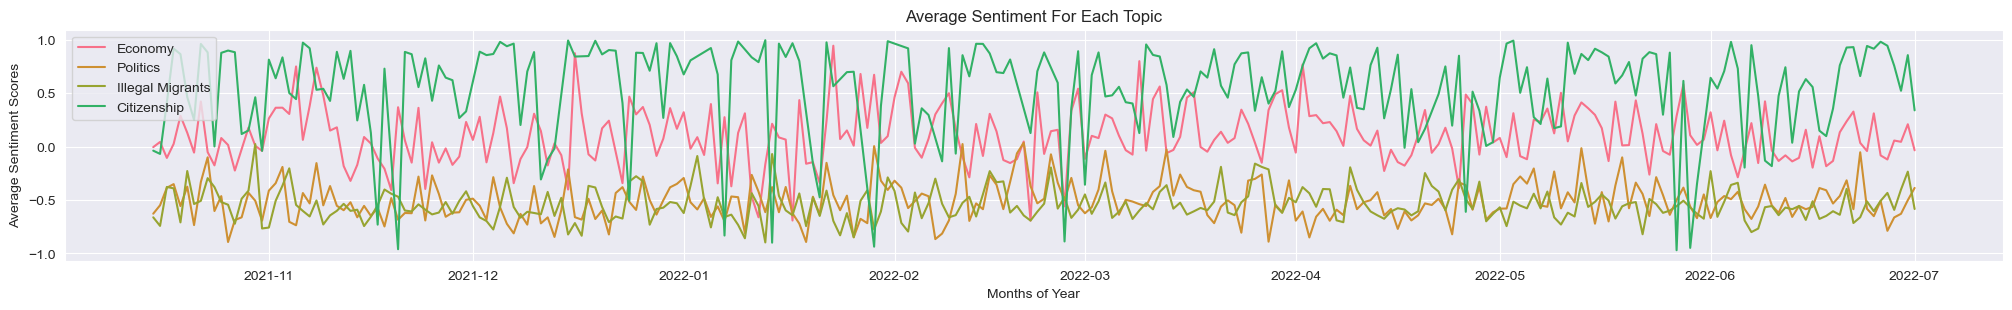

In [228]:
plt.figure(figsize=(25,3))
ax = sns.lineplot(x = "date", y = "sentiment_score",data = econ,label="Economy")
ax.set(xlabel='Months of Year', ylabel='Average Sentiment Scores')

ax = sns.lineplot(x = "date", y = "sentiment_score",data = pol,label="Politics")
ax.set(xlabel='Months of Year', ylabel='Average Sentiment Scores')

ax = sns.lineplot(x = "date", y = "sentiment_score",data = il,label="Illegal Migrants")
ax.set(xlabel='Months of Year', ylabel='Average Sentiment Scores')

ax = sns.lineplot(x = "date", y = "sentiment_score",data = ctz,label="Citizenship")
ax.set(xlabel='Months of Year', ylabel='Average Sentiment Scores')

plt.title("Average Sentiment For Each Topic")
plt.legend()
plt.savefig(r"D:\refugee-1-M\refugee-1M-four-batches\refugee-1M-lemma-batches\plots\sentiment-plot-each-topic-econ-politics-ill-citizen.pdf", format="pdf", bbox_inches="tight")
plt.show()

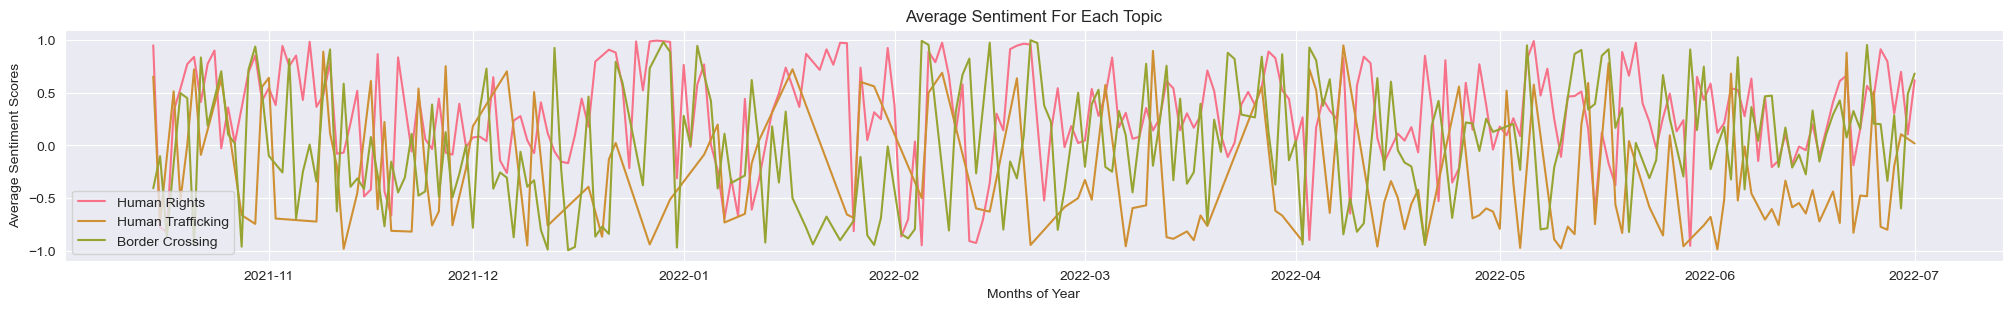

In [225]:
plt.figure(figsize=(25,3))
ax = sns.lineplot(x = "date", y = "sentiment_score",data = rgt,label="Human Rights")
ax.set(xlabel='Months of Year', ylabel='Average Sentiment Scores')

ax = sns.lineplot(x = "date", y = "sentiment_score",data = trf,label="Human Trafficking")
ax.set(xlabel='Months of Year', ylabel='Average Sentiment Scores')

ax = sns.lineplot(x = "date", y = "sentiment_score",data = brd,label="Border Crossing")
ax.set(xlabel='Months of Year', ylabel='Average Sentiment Scores')

plt.title("Average Sentiment For Each Topic")
plt.legend()
plt.savefig(r"D:\refugee-1-M\refugee-1M-four-batches\refugee-1M-lemma-batches\plots\sentiment-plot-each-topic-rght-trf-brd.pdf", format="pdf", bbox_inches="tight")
plt.show()


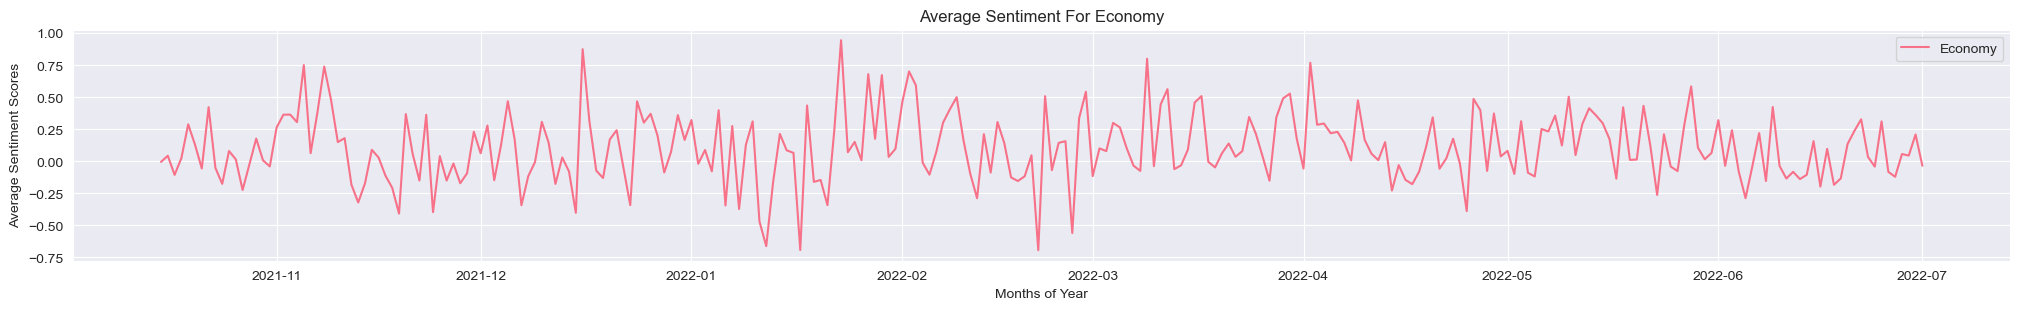

In [229]:
plt.figure(figsize=(25,3))
ax = sns.lineplot(x = "date", y = "sentiment_score",data = econ,label="Economy")
ax.set(xlabel='Months of Year', ylabel='Average Sentiment Scores')

plt.title("Average Sentiment For Economy")
plt.legend()
plt.savefig(r"D:\refugee-1-M\refugee-1M-four-batches\refugee-1M-lemma-batches\plots\sentiment-plot-economy.pdf", format="pdf", bbox_inches="tight")
plt.show()

#### Economic Variables 

In [402]:
df = pd.read_csv(r"D:\refugee-1-M\refugee-1M-four-batches\refugee-1M-lemma-batches\uk-bart-labelled-datasets\sentiment-predicted-data.csv")

In [403]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.date
df['time'] = df['created_at'].dt.time

In [404]:
lms = pd.read_excel(r"C:\Users\Topcu\Downloads\cpi-clean-excel.xlsx") #UK inflation and unemployment data https://www.ons.gov.uk/
lms["Months "] = pd.to_datetime(lms["Months "])
lms

,Months,CPIH,CPI,OOH,Total unemployment rate % seasonally adjusted
0,2021-11-01,4.6,5.1,2.1,4.0
1,2021-12-01,4.8,5.4,2.2,4.0
2,2022-01-01,4.9,5.5,2.4,3.8
3,2022-02-01,5.5,6.2,2.5,3.7
4,2022-03-01,6.2,7.0,2.7,3.8
5,2022-04-01,7.8,9.0,2.9,3.8
6,2022-05-01,7.9,9.1,3.0,3.8
7,2022-06-01,8.2,9.4,3.2,3.6
8,2022-07-01,8.8,10.1,3.4,3.5


In [412]:
lms.rename(columns={"Months ":"date"},inplace=True)

econ.reset_index(inplace=True)
econ = econ[["date","sentiment_score"]]

In [407]:
lms["Months "] = pd.to_datetime(lms["Months "], format="%b %Y")

In [408]:
lms["Days"] = lms["Months "].dt.day

In [409]:
lms.set_index("Days", inplace=True)

In [413]:
lms

,date,CPIH,CPI,OOH,Total unemployment rate % seasonally adjusted
Days,,,,,
1,2021-11-01,4.6,5.1,2.1,4.0
1,2021-12-01,4.8,5.4,2.2,4.0
1,2022-01-01,4.9,5.5,2.4,3.8
1,2022-02-01,5.5,6.2,2.5,3.7
1,2022-03-01,6.2,7.0,2.7,3.8
1,2022-04-01,7.8,9.0,2.9,3.8
1,2022-05-01,7.9,9.1,3.0,3.8
1,2022-06-01,8.2,9.4,3.2,3.6
1,2022-07-01,8.8,10.1,3.4,3.5


In [381]:
merged_df = pd.merge(lms, econ, on='date')

In [346]:
lms.columns

Index(['Months ', 'CPIH', 'CPI', 'OOH',
       'Total unemployment rate % seasonally adjusted '],
      dtype='object')

In [415]:
lms['date'] = pd.to_datetime(lms['date'], format='%Y-%m')

In [ ]:
lms['date'] = pd.to_datetime(lms['date'], format='%d/%m/%Y')
lms = lms.set_index('date').resample('D').ffill()

In [421]:
lms.reset_index(inplace=True)

In [436]:
econ = econ[17:]

In [440]:
econ.reset_index(inplace=True)

In [426]:
lms

,date,CPIH,CPI,OOH,Total unemployment rate % seasonally adjusted
0,2021-11-01,4.6,5.1,2.1,4.0
1,2021-11-02,4.6,5.1,2.1,4.0
2,2021-11-03,4.6,5.1,2.1,4.0
3,2021-11-04,4.6,5.1,2.1,4.0
4,2021-11-05,4.6,5.1,2.1,4.0
...,...,...,...,...,...
238,2022-06-27,8.2,9.4,3.2,3.6
239,2022-06-28,8.2,9.4,3.2,3.6
240,2022-06-29,8.2,9.4,3.2,3.6
241,2022-06-30,8.2,9.4,3.2,3.6


In [441]:
merged_df = pd.concat([lms, econ], axis =1, join = 'inner')

In [451]:
merged_df.head()

,date,CPIH,CPI,OOH,Total unemployment rate % seasonally adjusted,date,sentiment_score
0,2021-11-01,4.6,5.1,2.1,4.0,2021-11-01,0.264249
1,2021-11-02,4.6,5.1,2.1,4.0,2021-11-02,0.364555
2,2021-11-03,4.6,5.1,2.1,4.0,2021-11-03,0.365174
3,2021-11-04,4.6,5.1,2.1,4.0,2021-11-04,0.306256
4,2021-11-05,4.6,5.1,2.1,4.0,2021-11-05,0.751554


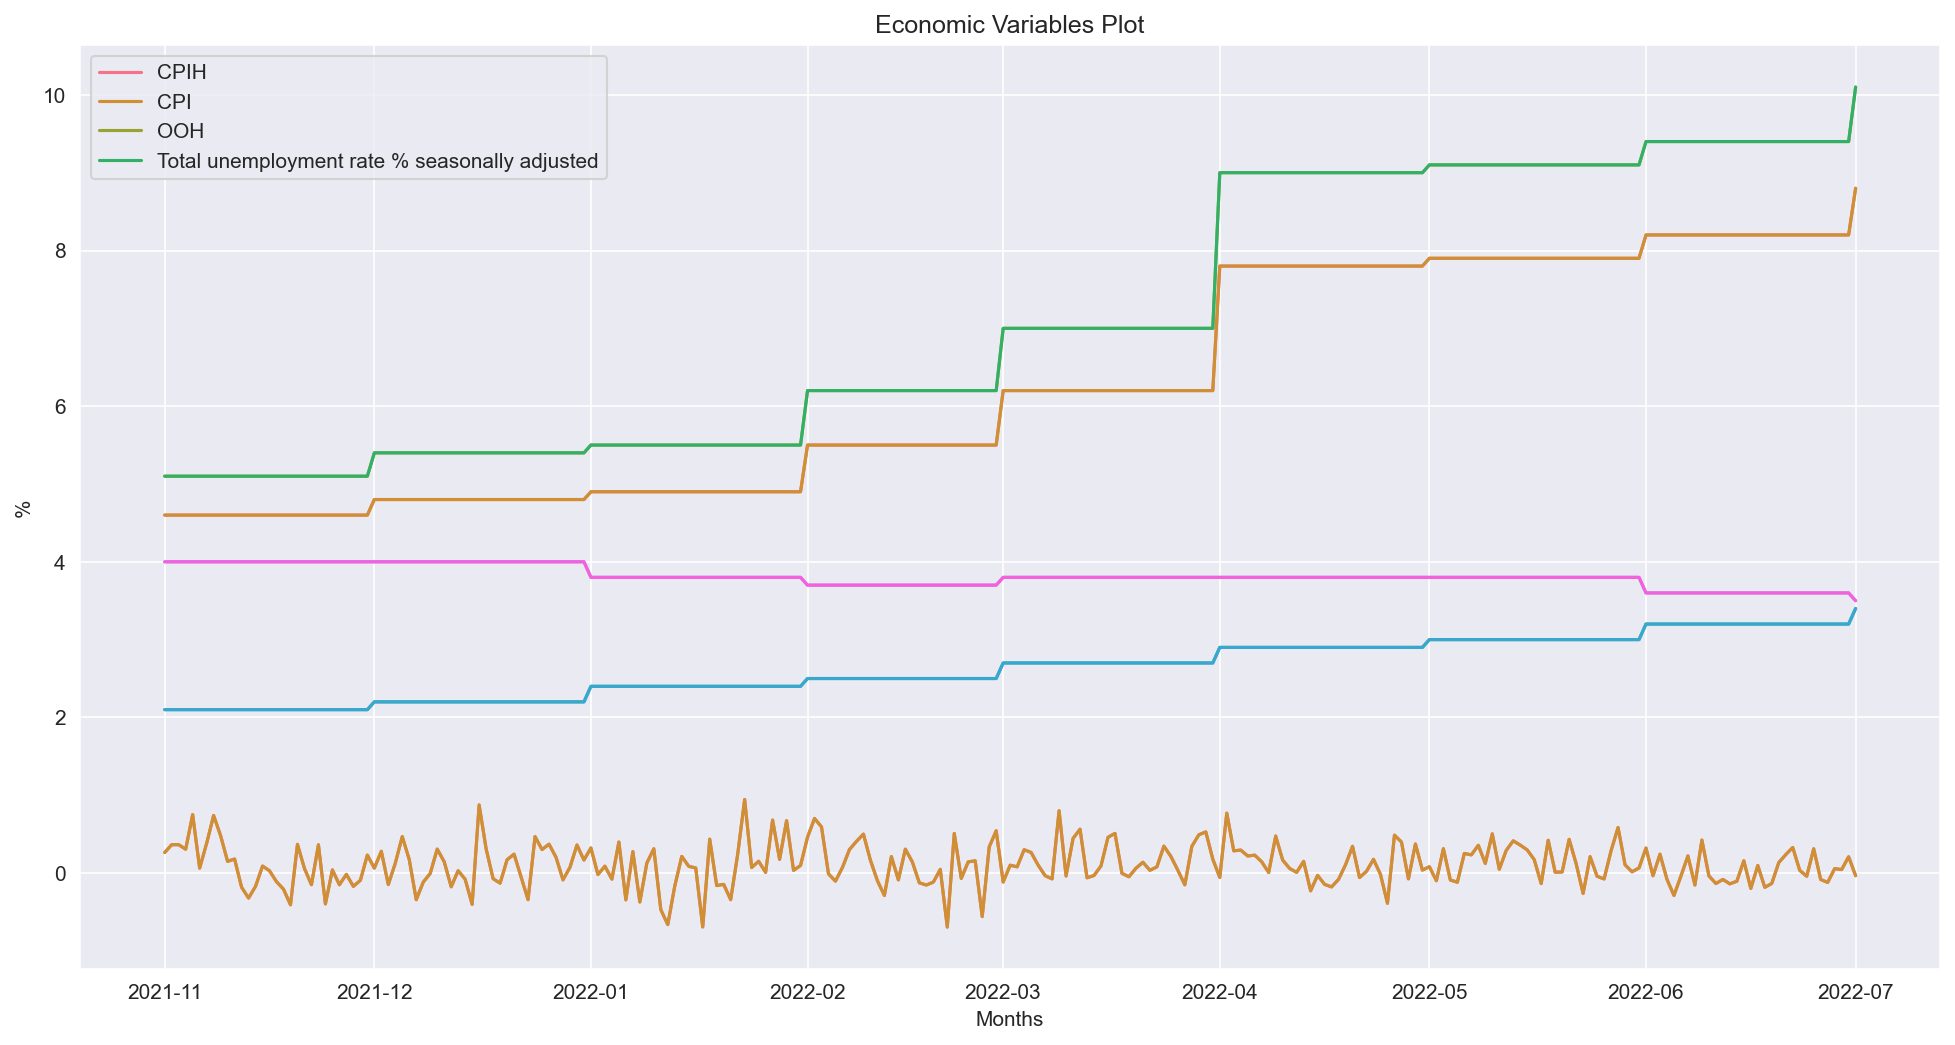

In [465]:
plt.figure(figsize=(16, 8), dpi=150)
plt.plot(merged_df['date'], merged_df['CPIH'])
plt.plot(merged_df['date'], merged_df['CPI'])
plt.plot(merged_df['date'], merged_df['OOH'])
plt.plot(merged_df['date'], merged_df['Total unemployment rate % seasonally adjusted '])
plt.plot(merged_df['date'], merged_df['sentiment_score'])
plt.xlabel('Months')
plt.ylabel('%')
plt.title('Economic Variables Plot')
plt.legend(['CPIH', 'CPI','OOH','Total unemployment rate % seasonally adjusted'])
plt.savefig(r"D:\refugee-1-M\refugee-1M-four-batches\refugee-1M-lemma-batches\plots\economic-variables-economy-plot.pdf",
            format="pdf",bbox_inches="tight")
plt.show()


In [455]:
merged_df.columns

Index(['date', 'CPIH', 'CPI', 'OOH',
       'Total unemployment rate % seasonally adjusted ', 'date',
       'sentiment_score'],
      dtype='object')

#### Pairwise Correlations

C:\Users\Topcu\AppData\Local\Temp\ipykernel_17412\1754741904.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_df.corr()


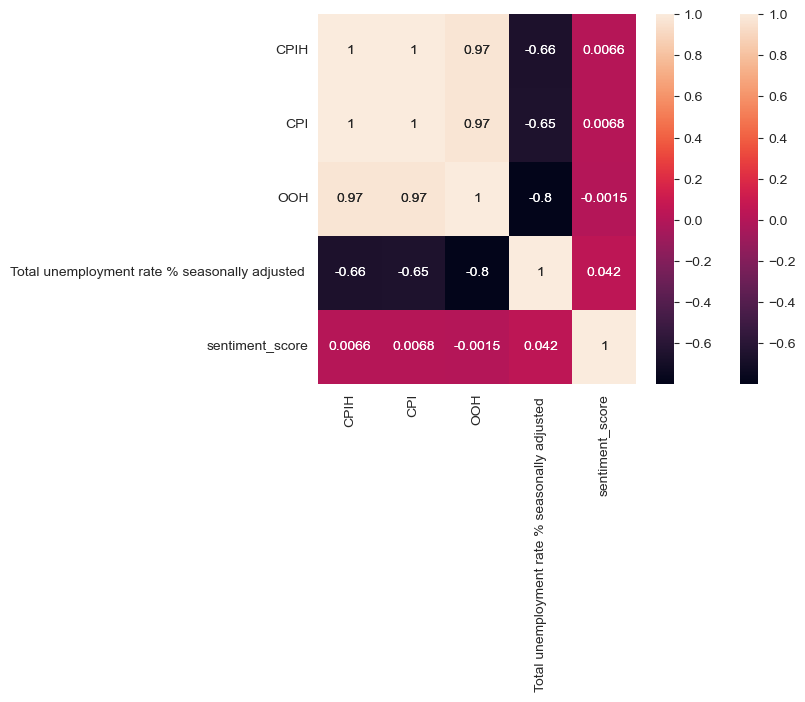

In [469]:
corr = merged_df.corr()
sns.heatmap(corr, cmap='rocket', annot=True)
heatmap = sns.heatmap(corr, cmap='rocket', annot=True)
figure = heatmap.get_figure()    
figure.savefig(r"D:\refugee-1-M\refugee-1M-four-batches\refugee-1M-lemma-batches\plots\heatmap.png", dpi=400)
plt.show()
## Pearson's r < 0.3 None or very weak

# To Do:

##### City Average Sentiments

1. Get sentiment score for each city.
2. Get poverty score for each city. 
3. Get immigrant prevalance for each city. 

##### News salience 

1. Try classifying economic immigrant news tweets to find daily news salience.
2. Scrape economic and immigrant related news OR just immigrant related news.

##### Correlation 

1. Might want to consider lagging the variables.
2. Can apply PCA or UMAP dimension reduction methods on the economic variables. 
3. Try finding daily inflation data & find other economic distress data.